In [1]:
%cd /hdd/yuchen/cs292/StableDiffusionReconstruction/codes/utils

/hdd/yuchen/cs292/StableDiffusionReconstruction/codes/utils


In [2]:
import os
import numpy as np
import torch
from PIL import Image
from einops import rearrange, repeat
import random
from torchmetrics.image.lpip import LearnedPerceptualImagePatchSimilarity
from skimage.metrics import structural_similarity
import scipy

In [3]:
seed = 42
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
torch.cuda.empty_cache()

device = "cuda:0" if torch.cuda.is_available() else "cpu"


In [4]:
from skimage.color import rgb2gray

def compare_one_set(i, lpips, folder_path):
    with torch.no_grad():
        base = str(f'{i:05}')
        orig = folder_path + f'{base}_org.png'
        orig_ = Image.open(orig).resize((512,512), Image.Resampling.BILINEAR)
        img2 = np.array(orig_)
        img2_gray = rgb2gray(img2)
        
        
        psm, ssim, pcc = 0, 0, 0
        for j in range(5):
            img = folder_path + f'{base}_{j:03}.png'
            img_ = Image.open(img)
            img1 = np.array(img_)
            img1_gray = rgb2gray(img1)
            
            if img1.shape[-1] == 3: img1 = rearrange(img1, 'w h c -> c w h')
            if img2.shape[-1] == 3: img2 = rearrange(img2, 'w h c -> c w h')
            if img1.max() > 1.5: img1 = img1 / 255.0*2 -1
            if img2.max() > 1.5: img2 = img2 / 255.0*2 -1
            if len(img1.shape) == 3: img1 = np.expand_dims(img1, axis=0)
            if len(img2.shape) == 3: img2 = np.expand_dims(img2, axis=0)
            
            psm += 0
            # psm += lpips(torch.FloatTensor(img1).to(device), torch.FloatTensor(img2).to(device)).item()
            ssim +=  structural_similarity(img1_gray,img2_gray,data_range=1)
            # ssim += structural_similarity(img1.squeeze(),img2.squeeze(), data_range=2, channel_axis=0)
            pcc += np.corrcoef(img1.reshape(-1), img2.reshape(-1))[0, 1]
            
    return psm/5, ssim/5, pcc/5

## original

In [20]:
# folder_path = '/hdd/yuchen/cs292/decoded/image-cvpr/subj01/samples/'
# device = "cuda:1" if torch.cuda.is_available() else "cpu"
# lpips = LearnedPerceptualImagePatchSimilarity(net_type='alex', reduction='mean').to(device)

# score = {'psm': [], 'ssim': [], 'pcc': []}
# for i in range(982):
#     test_score = compare_one_set(i, lpips, folder_path)
#     score['psm'].append(test_score[0])
#     score['ssim'].append(test_score[1])
#     score['pcc'].append(test_score[2])

In [49]:
np.mean(score['psm']), np.mean(score['ssim']), np.mean(score['pcc'])

(0.7694936517663982, 0.21412540824760676, 0.26591676333383873)

In [19]:
folder_path = '/hdd/yuchen/cs292/decoded/image-cvpr/subj01/nsd_roi/samples/'
device = "cuda:1" if torch.cuda.is_available() else "cpu"
lpips = LearnedPerceptualImagePatchSimilarity(net_type='alex', reduction='mean').to(device)

score = {'psm': [], 'ssim': [], 'pcc': []}
for i in range(982):
    print(i, end='/r')
    test_score = compare_one_set(i, lpips, folder_path)
    score['psm'].append(test_score[0])
    score['ssim'].append(test_score[1])
    score['pcc'].append(test_score[2])

/hdd/yuchen/anaconda3/envs/ldm/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [21]:
np.mean(score['psm']), np.mean(score['ssim']), np.mean(score['pcc'])

(0.730450360619609, 0.35246880651497664, 0.3256947334570046)

In [26]:
folder_path = '/hdd/yuchen/cs292/decoded/image-cvpr/subj01/new/samples/'
device = "cuda:1" if torch.cuda.is_available() else "cpu"
lpips = LearnedPerceptualImagePatchSimilarity(net_type='alex', reduction='mean').to(device)

score = {'psm': [], 'ssim': [], 'pcc': []}
for i in range(982):
    print(i, end='\r')
    test_score = compare_one_set(i, lpips, folder_path)
    score['psm'].append(test_score[0])
    score['ssim'].append(test_score[1])
    score['pcc'].append(test_score[2])

In [27]:
np.mean(score['psm']), np.mean(score['ssim']), np.mean(score['pcc'])

(0.0, 0.35278901812179275, 0.32459477367396145)

## better text and init

In [5]:
folder_path = '/hdd/yuchen/decoded/image-cvpr/subj01/better-text/samples/'
device = "cuda:1" if torch.cuda.is_available() else "cpu"
lpips = LearnedPerceptualImagePatchSimilarity(net_type='alex', reduction='mean').to(device)

score = {'psm': [], 'ssim': [], 'pcc': []}
for i in range(982):
    test_score = compare_one_set(i, lpips, folder_path)
    score['psm'].append(test_score[0])
    score['ssim'].append(test_score[1])
    score['pcc'].append(test_score[2])

/hdd/yuchen/anaconda3/envs/ldm/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/hdd/yuchen/anaconda3/envs/ldm/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
np.mean(score['psm']), np.mean(score['ssim']), np.mean(score['pcc'])

(0.7249358227927913, 0.30139977352164077, 0.29500395075040714)

In [50]:
folder_path = '/hdd/yuchen/decoded/image-cvpr/subj01/better-text-and-init/samples/'
device = "cuda:1" if torch.cuda.is_available() else "cpu"
lpips = LearnedPerceptualImagePatchSimilarity(net_type='alex', reduction='mean').to(device)

score = {'psm': [], 'ssim': [], 'pcc': []}
for i in range(982):
    test_score = compare_one_set(i, lpips, folder_path)
    score['psm'].append(test_score[0])
    score['ssim'].append(test_score[1])
    score['pcc'].append(test_score[2])

In [51]:
np.mean(score['psm']), np.mean(score['ssim']), np.mean(score['pcc'])

(0.7355259448229174, 0.3466594578214675, 0.3191785227860548)

In [ ]:
#new 

In [5]:
folder_path = '/hdd/yuchen/decoded/image-cvpr/subj01/new/samples/'
device = "cuda:1" if torch.cuda.is_available() else "cpu"
lpips = LearnedPerceptualImagePatchSimilarity(net_type='alex', reduction='mean').to(device)

score = {'psm': [], 'ssim': [], 'pcc': []}
for i in range(982):
    test_score = compare_one_set(i, lpips, folder_path)
    score['psm'].append(test_score[0])
    score['ssim'].append(test_score[1])
    score['pcc'].append(test_score[2])

/hdd/yuchen/anaconda3/envs/ldm/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/hdd/yuchen/anaconda3/envs/ldm/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
np.mean(score['psm']), np.mean(score['ssim']), np.mean(score['pcc'])

(0.7329007224128591, 0.35278901812179275, 0.32459477367396145)

## effecientnet average correlation distance

In [5]:
from torchvision.models import efficientnet_b1, EfficientNet_B1_Weights
from torchvision.models.feature_extraction import create_feature_extractor, get_graph_node_names
from torchvision import transforms
weights = EfficientNet_B1_Weights.DEFAULT
eff_model = create_feature_extractor(efficientnet_b1(weights=weights), 
                                    return_nodes=['avgpool']).to(device)
eff_model.eval().requires_grad_(False)

# see weights.transforms()
preprocess = transforms.Compose([
    # transforms.Resize(255, interpolation=transforms.InterpolationMode.BILINEAR),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

/hdd/yuchen/anaconda3/envs/ldm/lib/python3.8/site-packages/torch/overrides.py:110: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  torch.has_cuda,
/hdd/yuchen/anaconda3/envs/ldm/lib/python3.8/site-packages/torch/overrides.py:111: UserWarning: 'has_cudnn' is deprecated, please use 'torch.backends.cudnn.is_available()'
  torch.has_cudnn,
/hdd/yuchen/anaconda3/envs/ldm/lib/python3.8/site-packages/torch/overrides.py:117: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  torch.has_mps,
/hdd/yuchen/anaconda3/envs/ldm/lib/python3.8/site-packages/torch/overrides.py:118: UserWarning: 'has_mkldnn' is deprecated, please use 'torch.backends.mkldnn.is_available()'
  torch.has_mkldnn,


In [145]:
folder_path = '/hdd/yuchen/cs292/decoded/image-cvpr/subj01/new/samples/'

gt = []
ge = []
for i in range(982):
    print(i, end='\r')
    base = str(f'{i:05}')
    orig = folder_path + f'{base}_org.png'
    orig_ = Image.open(orig)
    img2 = np.array(orig_) / 255.0
    t = eff_model(preprocess(torch.tensor(img2, dtype=torch.float32).permute(2,0,1).unsqueeze(0).to(device)))['avgpool']
    gt.append(t.squeeze().cpu().numpy())
    lst = []
    for j in range(5):
        img = folder_path + f'{base}_{j:03}.png'
        img_ = Image.open(img)
        img1 = np.array(img_)/ 255.0
        g = eff_model(preprocess(torch.tensor(img1, dtype=torch.float32).permute(2,0,1).unsqueeze(0).to(device)))['avgpool']
        lst.append(np.array(g.squeeze().cpu().numpy()))
    ge.append(np.mean(lst,axis=0))
        

In [138]:
effnet = np.array([scipy.spatial.distance.correlation(gt[i],ge[i]) for i in range(len(gt))]).mean()            
effnet

0.6695661853059901

In [146]:
effnet = np.array([scipy.spatial.distance.correlation(gt[i],ge[i]) for i in range(len(gt))]).mean()            
effnet

0.48008898694955887

In [139]:
folder_path = '/hdd/yuchen/cs292/decoded/image-cvpr/subj01/samples/'

gt = []
ge = []
for i in range(982):
    print(i, end='\r')
    base = str(f'{i:05}')
    orig = folder_path + f'{base}_org.png'
    orig_ = Image.open(orig)
    img2 = np.array(orig_)/255.0
    t = eff_model(preprocess(torch.tensor(img2, dtype=torch.float32).permute(2,0,1).unsqueeze(0).to(device)))['avgpool']
    gt.append(t.squeeze().cpu().numpy())
    lst = []
    for j in range(5):
        img = folder_path + f'{base}_{j:03}.png'
        img_ = Image.open(img)
        img1 = np.array(img_)/255.0
        g = eff_model(preprocess(torch.tensor(img1, dtype=torch.float32).permute(2,0,1).unsqueeze(0).to(device)))['avgpool']
        lst.append(np.array(g.squeeze().cpu().numpy()))
    ge.append(np.mean(lst,axis=0))


In [140]:
effnet = np.array([scipy.spatial.distance.correlation(gt[i],ge[i]) for i in range(len(gt))]).mean()            
effnet        

0.9194753020877487

In [21]:
folder_path = '/hdd/yuchen/cs292/decoded/image-cvpr/subj01/nsd_roi/samples/'

gt = []
ge = []
for i in range(982):
    print(i, end='\r')
    base = str(f'{i:05}')
    orig = folder_path + f'{base}_org.png'
    orig_ = Image.open(orig)
    img2 = np.array(orig_)/255.0
    t = eff_model(preprocess(torch.tensor(img2, dtype=torch.float32).permute(2,0,1).unsqueeze(0).to(device)))['avgpool']
    gt.append(t.squeeze().cpu().numpy())
    lst = []
    for j in range(0,2):
        img = folder_path + f'{base}_{j:03}.png'
        img_ = Image.open(img)
        img1 = np.array(img_)/255.0
        g = eff_model(preprocess(torch.tensor(img1, dtype=torch.float32).permute(2,0,1).unsqueeze(0).to(device)))['avgpool']
        lst.append(np.array(g.squeeze().cpu().numpy()))
    ge.append(np.mean(lst,axis=0))


In [9]:
effnet = np.array([scipy.spatial.distance.correlation(gt[i],ge[i]) for i in range(len(gt))]).mean()            
effnet 

0.6645011436019025

## inception

In [10]:
from torchvision.models import inception_v3, Inception_V3_Weights
weights = Inception_V3_Weights.DEFAULT
inception_model = create_feature_extractor(inception_v3(weights=weights), 
                                           return_nodes=['avgpool']).to(device)
inception_model.eval().requires_grad_(False)

# see weights.transforms()
preprocess = transforms.Compose([
    transforms.Resize(342, interpolation=transforms.InterpolationMode.BILINEAR),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

from torchvision.models.feature_extraction import create_feature_extractor, get_graph_node_names

@torch.no_grad()
def two_way_identification(all_brain_recons, all_images, model, preprocess, feature_layer=None, return_avg=True):
    preds = model(torch.stack([preprocess(recon) for recon in all_brain_recons], dim=0).to(device))
    reals = model(torch.stack([preprocess(indiv) for indiv in all_images], dim=0).to(device))
    if feature_layer is None:
        preds = preds.float().flatten(1).cpu().numpy()
        reals = reals.float().flatten(1).cpu().numpy()
    else:
        preds = preds[feature_layer].float().flatten(1).cpu().numpy()
        reals = reals[feature_layer].float().flatten(1).cpu().numpy()

    r = np.corrcoef(reals, preds)
    r = r[:len(all_images), len(all_images):]
    congruents = np.diag(r)

    success = r < congruents
    success_cnt = np.sum(success, 0)

    if return_avg:
        perf = np.mean(success_cnt) / (len(all_images)-1)
        return perf
    else:
        return success_cnt, len(all_images)-1

/hdd/yuchen/anaconda3/envs/ldm/lib/python3.8/site-packages/torchvision/models/feature_extraction.py:174: UserWarning: NOTE: The nodes obtained by tracing the model in eval mode are a subsequence of those obtained in train mode. When choosing nodes for feature extraction, you may need to specify output nodes for train and eval mode separately.
  warnings.warn(msg + suggestion_msg)


In [134]:
# folder_path = '/hdd/yuchen/cs292/decoded/image-cvpr/subj01/samples/'
folder_path = '/hdd/yuchen/cs292/decoded/image-cvpr/subj01/new/samples/'

gt = []
ge = []
for i in range(982):
    print(i, end='\r')
    base = str(f'{i:05}')
    orig = folder_path + f'{base}_org.png'
    orig_ = Image.open(orig).resize((512,512), Image.Resampling.BILINEAR)
    img2 = np.array(orig_)/255.0
    t = inception_model(preprocess(torch.tensor(img2, dtype=torch.float32).permute(2,0,1).unsqueeze(0).to(device)))['avgpool']
    gt.append(t.squeeze().cpu().numpy())
    lst = []
    for j in range(5):
        img = folder_path + f'{base}_{j:03}.png'
        img_ = Image.open(img)
        img1 = np.array(img_)/255.0
        g = inception_model(preprocess(torch.tensor(img1, dtype=torch.float32).permute(2,0,1).unsqueeze(0).to(device)))['avgpool']
        lst.append(g.squeeze().cpu().numpy())
    ge.append(np.mean(lst,axis=0))

r = np.corrcoef(gt, ge)
r = r[:len(gt), len(gt):]
congruents = np.diag(r)

success = r < congruents
success_cnt = np.sum(success, 0)

perf = np.mean(success_cnt) / (len(gt)-1)

inception = np.mean(perf)
print(f"2-way Percent Correct: {inception:.4f}")

2-way Percent Correct: 0.9004


In [135]:
folder_path = '/hdd/yuchen/cs292/decoded/image-cvpr/subj01/samples/'

gt = []
ge = []
for i in range(982):
    print(i, end='\r')
    base = str(f'{i:05}')
    orig = folder_path + f'{base}_org.png'
    orig_ = Image.open(orig).resize((512,512), Image.Resampling.BILINEAR)
    img2 = np.array(orig_)/255.0
    t = inception_model(preprocess(torch.tensor(img2, dtype=torch.float32).permute(2,0,1).unsqueeze(0).to(device)))['avgpool']
    gt.append(t.squeeze().cpu().numpy())
    lst = []
    for j in range(5):
        img = folder_path + f'{base}_{j:03}.png'
        img_ = Image.open(img)
        img1 = np.array(img_)/255.0
        g = inception_model(preprocess(torch.tensor(img1, dtype=torch.float32).permute(2,0,1).unsqueeze(0).to(device)))['avgpool']
        lst.append(g.squeeze().cpu().numpy())
    ge.append(np.mean(lst,axis=0))


r = np.corrcoef(gt, ge)
r = r[:len(gt), len(gt):]
congruents = np.diag(r)

success = r < congruents
success_cnt = np.sum(success, 0)

perf = np.mean(success_cnt) / (len(gt)-1)

inception = np.mean(perf)
print(f"2-way Percent Correct: {inception:.4f}")

2-way Percent Correct: 0.7180


In [11]:
# folder_path = '/hdd/yuchen/cs292/decoded/image-cvpr/subj01/samples/'
folder_path = '/hdd/yuchen/cs292/decoded/image-cvpr/subj01/nsd_roi/samples/'

gt = []
ge = []
for i in range(982):
    print(i, end='\r')
    base = str(f'{i:05}')
    orig = folder_path + f'{base}_org.png'
    orig_ = Image.open(orig).resize((512,512), Image.Resampling.BILINEAR)
    img2 = np.array(orig_)/255.0
    t = inception_model(preprocess(torch.tensor(img2, dtype=torch.float32).permute(2,0,1).unsqueeze(0).to(device)))['avgpool']
    gt.append(t.squeeze().cpu().numpy())
    lst = []
    for j in range(5):
        img = folder_path + f'{base}_{j:03}.png'
        img_ = Image.open(img)
        img1 = np.array(img_)/255.0
        g = inception_model(preprocess(torch.tensor(img1, dtype=torch.float32).permute(2,0,1).unsqueeze(0).to(device)))['avgpool']
        lst.append(g.squeeze().cpu().numpy())
    ge.append(np.mean(lst,axis=0))

r = np.corrcoef(gt, ge)
r = r[:len(gt), len(gt):]
congruents = np.diag(r)

success = r < congruents
success_cnt = np.sum(success, 0)

perf = np.mean(success_cnt) / (len(gt)-1)

inception = np.mean(perf)
print(f"2-way Percent Correct: {inception:.4f}")

/hdd/yuchen/anaconda3/envs/ldm/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


2-way Percent Correct: 0.9064


## clip

In [12]:
import clip
clip_model, preprocess = clip.load("ViT-L/14", device=device)

preprocess = transforms.Compose([
    transforms.Resize(224, interpolation=transforms.InterpolationMode.BILINEAR),
    transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
                         std=[0.26862954, 0.26130258, 0.27577711]),
])

In [131]:
folder_path = '/hdd/yuchen/cs292/decoded/image-cvpr/subj01/new/samples/'

gt = []
ge = []
for i in range(982):
    print(i, end='\r')
    base = str(f'{i:05}')
    orig = folder_path + f'{base}_org.png'
    orig_ = Image.open(orig).resize((512,512), Image.Resampling.BILINEAR)
    img2 = np.array(orig_)/255.0
    t = clip_model.encode_image(preprocess(torch.tensor(img2, dtype=torch.float32).permute(2,0,1).unsqueeze(0).to(device)))
    gt.append(t.squeeze().detach().cpu().numpy())
    lst = []
    for j in range(5):
        img = folder_path + f'{base}_{j:03}.png'
        img_ = Image.open(img)
        img1 = np.array(img_)/255.0
        g = clip_model.encode_image(preprocess(torch.tensor(img1, dtype=torch.float32).permute(2,0,1).unsqueeze(0).to(device)))
        lst.append(g.squeeze().detach().cpu().numpy())
    ge.append(np.mean(lst,axis=0))


r = np.corrcoef(gt, ge)
r = r[:len(gt), len(gt):]
congruents = np.diag(r)

success = r < congruents
success_cnt = np.sum(success, 0)

all_per_correct = np.mean(success_cnt) / (len(gt)-1)

clip_ = np.mean(all_per_correct)
print(f"2-way Percent Correct: {clip_:.4f}")

2-way Percent Correct: 0.8524


In [132]:
folder_path = '/hdd/yuchen/cs292/decoded/image-cvpr/subj01/samples/'

gt = []
ge = []
for i in range(982):
    print(i, end='\r')
    base = str(f'{i:05}')
    orig = folder_path + f'{base}_org.png'
    orig_ = Image.open(orig).resize((512,512), Image.Resampling.BILINEAR)
    img2 = np.array(orig_)/255.0
    t = clip_model.encode_image(preprocess(torch.tensor(img2, dtype=torch.float32).permute(2,0,1).unsqueeze(0).to(device)))
    gt.append(t.squeeze().detach().cpu().numpy())
    lst = []
    for j in range(5):
        img = folder_path + f'{base}_{j:03}.png'
        img_ = Image.open(img)
        img1 = np.array(img_)/255.0
        g = clip_model.encode_image(preprocess(torch.tensor(img1, dtype=torch.float32).permute(2,0,1).unsqueeze(0).to(device)))
        lst.append(g.squeeze().detach().cpu().numpy())
    ge.append(np.mean(lst,axis=0))

r = np.corrcoef(gt, ge)
r = r[:len(gt), len(gt):]
congruents = np.diag(r)

success = r < congruents
success_cnt = np.sum(success, 0)

all_per_correct = np.mean(success_cnt) / (len(gt)-1)

clip_ = np.mean(all_per_correct)
print(f"2-way Percent Correct: {clip_:.4f}")

2-way Percent Correct: 0.6459


In [13]:
folder_path = '/hdd/yuchen/cs292/decoded/image-cvpr/subj01/nsd_roi/samples/'

gt = []
ge = []
for i in range(982):
    print(i, end='\r')
    base = str(f'{i:05}')
    orig = folder_path + f'{base}_org.png'
    orig_ = Image.open(orig).resize((512,512), Image.Resampling.BILINEAR)
    img2 = np.array(orig_)/255.0
    t = clip_model.encode_image(preprocess(torch.tensor(img2, dtype=torch.float32).permute(2,0,1).unsqueeze(0).to(device)))
    gt.append(t.squeeze().detach().cpu().numpy())
    lst = []
    for j in range(5):
        img = folder_path + f'{base}_{j:03}.png'
        img_ = Image.open(img)
        img1 = np.array(img_)/255.0
        g = clip_model.encode_image(preprocess(torch.tensor(img1, dtype=torch.float32).permute(2,0,1).unsqueeze(0).to(device)))
        lst.append(g.squeeze().detach().cpu().numpy())
    ge.append(np.mean(lst,axis=0))


r = np.corrcoef(gt, ge)
r = r[:len(gt), len(gt):]
congruents = np.diag(r)

success = r < congruents
success_cnt = np.sum(success, 0)

all_per_correct = np.mean(success_cnt) / (len(gt)-1)

clip_ = np.mean(all_per_correct)
print(f"2-way Percent Correct: {clip_:.4f}")

2-way Percent Correct: 0.8689


## swim

In [14]:
swav_model = torch.hub.load('facebookresearch/swav:main', 'resnet50')
swav_model = create_feature_extractor(swav_model, 
                                    return_nodes=['avgpool']).to(device)
swav_model.eval().requires_grad_(False)

preprocess = transforms.Compose([
    transforms.Resize(224, interpolation=transforms.InterpolationMode.BILINEAR),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

folder_path = '/hdd/yuchen/cs292/decoded/image-cvpr/subj01/new/samples/'

gt = []
ge = []
for i in range(982):
    print(i, end='\r')
    base = str(f'{i:05}')
    orig = folder_path + f'{base}_org.png'
    orig_ = Image.open(orig)
    img2 = np.array(orig_)
    t = swav_model(preprocess(torch.tensor(img2, dtype=torch.float32).permute(2,0,1).unsqueeze(0).to(device)))['avgpool']
    gt.append(t.squeeze().cpu().numpy())
    lst = []
    for j in range(1):
        img = folder_path + f'{base}_{j:03}.png'
        img_ = Image.open(img)
        img1 = np.array(img_)
        g = swav_model(preprocess(torch.tensor(img1, dtype=torch.float32).permute(2,0,1).unsqueeze(0).to(device)))['avgpool']
        lst.append(np.array(g.squeeze().cpu().numpy()))
    ge.append(np.mean(lst,axis=0))

swim = np.array([scipy.spatial.distance.correlation(gt[i],ge[i]) for i in range(len(gt))]).mean()            
swim   

Using cache found in /home/yuchen/.cache/torch/hub/facebookresearch_swav_main
/hdd/yuchen/anaconda3/envs/ldm/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/hdd/yuchen/anaconda3/envs/ldm/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


KeyboardInterrupt: 

In [128]:
swav_model = torch.hub.load('facebookresearch/swav:main', 'resnet50')
swav_model = create_feature_extractor(swav_model, 
                                    return_nodes=['avgpool']).to(device)
swav_model.eval().requires_grad_(False)

preprocess = transforms.Compose([
    transforms.Resize(224, interpolation=transforms.InterpolationMode.BILINEAR),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

folder_path = '/hdd/yuchen/cs292/decoded/image-cvpr/subj01/samples/'

gt = []
ge = []
for i in range(982):
    print(i, end='\r')
    base = str(f'{i:05}')
    orig = folder_path + f'{base}_org.png'
    orig_ = Image.open(orig)
    img2 = np.array(orig_)/255
    t = swav_model(preprocess(torch.tensor(img2, dtype=torch.float32).permute(2,0,1).unsqueeze(0).to(device)))['avgpool']
    gt.append(t.squeeze().cpu().numpy())
    lst = []
    for j in range(1):
        img = folder_path + f'{base}_{j:03}.png'
        img_ = Image.open(img)
        img1 = np.array(img_)/255
        g = swav_model(preprocess(torch.tensor(img1, dtype=torch.float32).permute(2,0,1).unsqueeze(0).to(device)))['avgpool']
        lst.append(np.array(g.squeeze().cpu().numpy()))
    ge.append(np.mean(lst,axis=0))

swim = np.array([scipy.spatial.distance.correlation(gt[i],ge[i]) for i in range(len(gt))]).mean()            
swim   

Using cache found in /home/yuchen/.cache/torch/hub/facebookresearch_swav_main


0.6738561929759329

In [16]:
swav_model = torch.hub.load('facebookresearch/swav:main', 'resnet50')
swav_model = create_feature_extractor(swav_model, 
                                    return_nodes=['avgpool']).to(device)
swav_model.eval().requires_grad_(False)

preprocess = transforms.Compose([
    transforms.Resize(224, interpolation=transforms.InterpolationMode.BILINEAR),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

folder_path = '/hdd/yuchen/cs292/decoded/image-cvpr/subj01/new/samples/'

gt = []
ge = []
for i in range(982):
    print(i, end='\r')
    base = str(f'{i:05}')
    orig = folder_path + f'{base}_org.png'
    orig_ = Image.open(orig)
    img2 = np.array(orig_)/255
    t = swav_model(preprocess(torch.tensor(img2, dtype=torch.float32).permute(2,0,1).unsqueeze(0).to(device)))['avgpool']
    gt.append(t.squeeze().cpu().numpy())
    lst = []
    for j in range(5):
        img = folder_path + f'{base}_{j:03}.png'
        img_ = Image.open(img)
        img1 = np.array(img_)/255
        g = swav_model(preprocess(torch.tensor(img1, dtype=torch.float32).permute(2,0,1).unsqueeze(0).to(device)))['avgpool']
        lst.append(np.array(g.squeeze().cpu().numpy()))
    ge.append(np.mean(lst,axis=0))

swim = np.array([scipy.spatial.distance.correlation(gt[i],ge[i]) for i in range(len(gt))]).mean()            
swim   

Using cache found in /home/yuchen/.cache/torch/hub/facebookresearch_swav_main


0.38680032059519937

In [17]:
swav_model = torch.hub.load('facebookresearch/swav:main', 'resnet50')
swav_model = create_feature_extractor(swav_model, 
                                    return_nodes=['avgpool']).to(device)
swav_model.eval().requires_grad_(False)

preprocess = transforms.Compose([
    transforms.Resize(224, interpolation=transforms.InterpolationMode.BILINEAR),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

folder_path = '/hdd/yuchen/cs292/decoded/image-cvpr/subj01/nsd_roi/samples/'

gt = []
ge = []
for i in range(982):
    print(i, end='\r')
    base = str(f'{i:05}')
    orig = folder_path + f'{base}_org.png'
    orig_ = Image.open(orig)
    img2 = np.array(orig_)/255
    t = swav_model(preprocess(torch.tensor(img2, dtype=torch.float32).permute(2,0,1).unsqueeze(0).to(device)))['avgpool']
    gt.append(t.squeeze().cpu().numpy())
    lst = []
    for j in range(5):
        img = folder_path + f'{base}_{j:03}.png'
        img_ = Image.open(img)
        img1 = np.array(img_)/255
        g = swav_model(preprocess(torch.tensor(img1, dtype=torch.float32).permute(2,0,1).unsqueeze(0).to(device)))['avgpool']
        lst.append(np.array(g.squeeze().cpu().numpy()))
    ge.append(np.mean(lst,axis=0))

swim = np.array([scipy.spatial.distance.correlation(gt[i],ge[i]) for i in range(len(gt))]).mean()            
swim   

Using cache found in /home/yuchen/.cache/torch/hub/facebookresearch_swav_main


0.3805987556178555

In [7]:
# folder_path = '/hdd/yuchen/cs292/decoded/image-cvpr/subj01/new/samples/'
folder_path = '/hdd/yuchen/cs292/decoded/image-cvpr/subj01/samples/'
from transformers import CLIPProcessor, CLIPModel
processor_clip = CLIPProcessor.from_pretrained("openai/clip-vit-large-patch14")
model_clip = CLIPModel.from_pretrained("openai/clip-vit-large-patch14")
model_clip.to(device)


gt = []
ge = []
for i in range(982):
    print(i, end='\r')
    base = str(f'{i:05}')
    orig = folder_path + f'{base}_org.png'
    # orig_ = Image.open(orig).resize((512,512), Image.Resampling.BILINEAR)
    orig_ = Image.open(orig)
    img2 = np.array(orig_)

    inputs = processor_clip(text="",images=img2, return_tensors="pt").to(device)
    outputs = model_clip(**inputs,output_hidden_states=True)
    feat_clip = outputs.image_embeds.cpu().detach().numpy().copy()
    gt.append(feat_clip)
    
    
    # t = clip_model(preprocess(torch.tensor(img2, dtype=torch.float32).permute(2,0,1).unsqueeze(0).to(device)), text='')
    # gt.append(t.squeeze().float().detach().cpu().numpy())
    lst = []
    for j in range(5):
        img = folder_path + f'{base}_{j:03}.png'
        img_ = Image.open(img)
        img1 = np.array(img_)
        inputs = processor_clip(text="",images=img1, return_tensors="pt").to(device)
        outputs = model_clip(**inputs,output_hidden_states=True)
        feat_clip = outputs.image_embeds.cpu().detach().numpy().copy()
    
        ge.append(feat_clip)

KeyboardInterrupt: 

In [6]:
ge_cor = []
for idx in range(982):
    best_cor = 0
    best_ct = 0
    for ct in range(5):
        cor = np.corrcoef(gt[idx], ge[idx*5 + ct])[0,1]
        if cor > best_cor:
            best_cor = cor
            best_ct = ct
    ge_cor.append(ge[idx*5 + best_ct])


NameError: name 'gt' is not defined

In [141]:
r = np.corrcoef(ge_cor, gt)
r = r[:len(gt), len(gt):]

congruents = np.diag(r)

success = r < congruents
success_cnt = np.sum(success, 0)

all_per_correct = np.mean(success_cnt) / (len(gt)-1)

clip_ = np.mean(all_per_correct)
print(f"2-way Percent Correct: {clip_:.4f}")

ValueError: m has more than 2 dimensions

In [94]:
lst[0].shape

(768,)

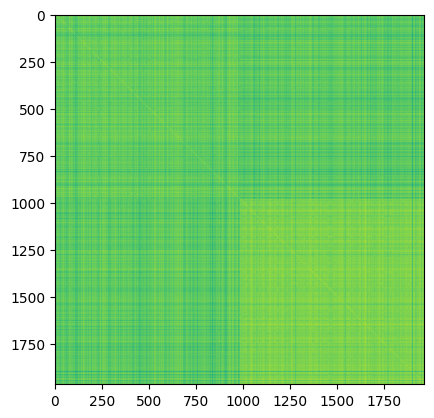

In [87]:
from matplotlib import pyplot as plt
r = np.corrcoef(gt, ge)
plt.imshow(r)

In [75]:
t.shape

torch.Size([1, 768])

In [48]:
r = np.corrcoef(gt, ge)
# r = r[:len(gt), len(gt):]
# congruents = np.diag(r)
# congruents
r.shape

(1964, 1964)

In [50]:
len(gt)

982

In [1]:
# from matplotlib import pyplot as plt
# t = np.array([scipy.spatial.distance.correlation(gt[i],ge[i]) for i in range(len(gt))])
# for i in np.where(t<0.3)[0]:
#     plt.figure()
#     for folder_path in ['/hdd/yuchen/decoded/image-cvpr/subj01/new/samples/',
#                        '/hdd/yuchen/decoded/image-cvpr/subj01/samples/']:
#         fig, axs = plt.subplots(1, 6, figsize=(18, 3))
#         fig.suptitle(i)
#         base = str(f'{i:05}')
#         orig = folder_path + f'{base}_org.png'
#         orig_ = Image.open(orig).resize((512,512), Image.Resampling.BILINEAR)
#         axs[0].imshow(orig_)
#         for j in range(5):
#             img = folder_path + f'{base}_{j:03}.png'
#             img_ = Image.open(img)
#             axs[j+1].imshow(img_)


In [53]:
# folder_path = '/hdd/yuchen/decoded/image-cvpr/subj01/better-text/samples/'

# gt = []
# ge = []
# for i in range(982):
#     base = str(f'{i:05}')
#     orig = folder_path + f'{base}_org.png'
#     orig_ = Image.open(orig).resize((512,512), Image.Resampling.BILINEAR)
#     img2 = np.array(orig_)
#     t = eff_model(preprocess(torch.tensor(img2, dtype=torch.float32).permute(2,0,1).unsqueeze(0).to(device)))['avgpool']
#     gt.append(t.squeeze().cpu().numpy())
#     lst = []
#     for j in range(5):
#         img = folder_path + f'{base}_{j:03}.png'
#         img_ = Image.open(img)
#         img1 = np.array(img_)
#         g = eff_model(preprocess(torch.tensor(img1, dtype=torch.float32).permute(2,0,1).unsqueeze(0).to(device)))['avgpool']
#         lst.append(g.squeeze().cpu().numpy())
#     ge.append(np.mean(lst,axis=0))
        

In [54]:
# import scipy
# effnet = np.array([scipy.spatial.distance.correlation(gt[i],ge[i]) for i in range(len(gt))]).mean()            
# effnet

In [27]:
folder_path = '/hdd/yuchen/decoded/image-cvpr/subj01/samples/'

gt = []
ge = []
for i in range(982):
    print(i, end='\r')
    base = str(f'{i:05}')
    orig = folder_path + f'{base}_org.png'
    orig_ = Image.open(orig).resize((512,512), Image.Resampling.BILINEAR)
    img2 = np.array(orig_)
    t = eff_model(preprocess(torch.tensor(img2, dtype=torch.float32).permute(2,0,1).unsqueeze(0).to(device)))['avgpool']
    gt.append(t.squeeze().cpu().numpy())
    lst = []
    for j in range(5):
        img = folder_path + f'{base}_{j:03}.png'
        img_ = Image.open(img)
        img1 = np.array(img_)
        g = eff_model(preprocess(torch.tensor(img1, dtype=torch.float32).permute(2,0,1).unsqueeze(0).to(device)))['avgpool']
        lst.append(g.squeeze().cpu().numpy())
    ge.append(np.mean(lst,axis=0))

effnet = np.array([scipy.spatial.distance.correlation(gt[i],ge[i]) for i in range(len(gt))]).mean()            

In [28]:
effnet

0.27906965468905853

In [72]:
from matplotlib import pyplot as plt
# t = np.array([scipy.spatial.distance.correlation(gt[i],ge[i]) for i in range(len(gt))])
# for i in np.where((t>0.6) & (t<0.65))[0]:
#     plt.figure()
#     for folder_path in ['/hdd/yuchen/decoded/image-cvpr/subj01/new/samples/',
#                        '/hdd/yuchen/decoded/image-cvpr/subj01/samples/']:
#         fig, axs = plt.subplots(1, 6, figsize=(18, 3))
#         fig.suptitle(i)
#         base = str(f'{i:05}')
#         orig = folder_path + f'{base}_org.png'
#         orig_ = Image.open(orig).resize((512,512), Image.Resampling.BILINEAR)
#         axs[0].imshow(orig_)
#         for j in range(5):
#             img = folder_path + f'{base}_{j:03}.png'
#             img_ = Image.open(img)
#             axs[j+1].imshow(img_)


In [ ]:
from matplotlib import pyplot as plt
img_dict = {14:[1,1],179:[1,1],803:[1,4],289:[2,4],
            954:[3,0],825:[1,1],225:[0,0],186:[2,4]}
fig, axs = plt.subplots(3, 8, figsize=(24, 9))

gt_path = '/hdd/yuchen/decoded/image-cvpr/subj01/new/samples/'
baseline_path = '/hdd/yuchen/decoded/image-cvpr/subj01/samples/'
pred_path = '/hdd/yuchen/decoded/image-cvpr/subj01/new/samples/'
ct = 0
for idx in img_dict.keys():
    base = str(f'{idx:05}')
    orig = gt_path + f'{base}_org.png'
    orig_ = Image.open(orig).resize((512,512), Image.Resampling.BILINEAR)
    axs[0, ct].imshow(orig_)
    baseline = baseline_path + f'{base}_{img_dict[idx][1]:03}.png'
    baseline_ = Image.open(baseline)
    pred = pred_path + f'{base}_{img_dict[idx][0]:03}.png'
    pred_ = Image.open(pred)
    axs[1, ct].imshow(baseline_)
    axs[2, ct].imshow(pred_)
    ct += 1

for i in range(3):
    for j in range(8):
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])

axs[0,0].set_ylabel('Ground Truth', fontsize=30)
axs[1,0].set_ylabel('Baseline [2]', fontsize=30)
axs[2,0].set_ylabel('Ours', fontsize=30,fontweight='bold')
fig.suptitle('Dataset: NSD', fontsize=40)
plt.tight_layout()

## things

In [5]:
gt_path = '/hdd/yuchen/decoded/image-cvpr/subj01/things/samples/'
baseline_path = '/hdd/yuchen/decoded/image-cvpr/subj01/things-baseline/samples/'
pred_path = '/hdd/yuchen/decoded/image-cvpr/subj01/things/samples/'

folder_path = baseline_path
device = "cuda:1" if torch.cuda.is_available() else "cpu"
lpips = LearnedPerceptualImagePatchSimilarity(net_type='alex', reduction='mean').to(device)

score = {'psm': [], 'ssim': [], 'pcc': []}
for i in range(100):
    test_score = compare_one_set(i, lpips, folder_path)
    score['psm'].append(test_score[0])
    score['ssim'].append(test_score[1])
    score['pcc'].append(test_score[2])

/hdd/yuchen/anaconda3/envs/ldm/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/hdd/yuchen/anaconda3/envs/ldm/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [7]:
np.mean(score['psm']), np.mean(score['ssim']), np.mean(score['pcc'])

(0.8364138433933259, 0.24069024136654116, 0.1293141983693315)

In [8]:
gt_path = '/hdd/yuchen/decoded/image-cvpr/subj01/things/samples/'
baseline_path = '/hdd/yuchen/decoded/image-cvpr/subj01/things-baseline/samples/'
pred_path = '/hdd/yuchen/decoded/image-cvpr/subj01/things/samples/'

folder_path = pred_path
device = "cuda:1" if torch.cuda.is_available() else "cpu"
lpips = LearnedPerceptualImagePatchSimilarity(net_type='alex', reduction='mean').to(device)

score = {'psm': [], 'ssim': [], 'pcc': []}
for i in range(100):
    test_score = compare_one_set(i, lpips, folder_path)
    score['psm'].append(test_score[0])
    score['ssim'].append(test_score[1])
    score['pcc'].append(test_score[2])

In [9]:
np.mean(score['psm']), np.mean(score['ssim']), np.mean(score['pcc'])

(0.8148117184042928, 0.3993418190883352, 0.20134562677802856)

In [19]:
from torchvision.models import efficientnet_v2_s, EfficientNet_V2_S_Weights
from torchvision.models.feature_extraction import create_feature_extractor, get_graph_node_names
from torchvision import transforms
weights = EfficientNet_V2_S_Weights.DEFAULT
eff_model = create_feature_extractor(efficientnet_v2_s(weights=weights), 
                                    return_nodes=['avgpool']).to(device)
eff_model.eval().requires_grad_(False)

# see weights.transforms()
preprocess = transforms.Compose([
    # transforms.Resize(255, interpolation=transforms.InterpolationMode.BILINEAR),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

In [20]:
gt_path = '/hdd/yuchen/decoded/image-cvpr/subj01/things/samples/'
baseline_path = '/hdd/yuchen/decoded/image-cvpr/subj01/things-baseline/samples/'
pred_path = '/hdd/yuchen/decoded/image-cvpr/subj01/things/samples/'

folder_path = baseline_path

gt = []
ge = []
for i in range(100):
    print(i, end='\r')
    base = str(f'{i:05}')
    orig = folder_path + f'{base}_org.png'
    orig_ = Image.open(orig).resize((512,512), Image.Resampling.BILINEAR)
    img2 = np.array(orig_)
    t = eff_model(preprocess(torch.tensor(img2, dtype=torch.float32).permute(2,0,1).unsqueeze(0).to(device)))['avgpool']
    gt.append(t.squeeze().cpu().numpy())
    lst = []
    for j in range(5):
        img = folder_path + f'{base}_{j:03}.png'
        img_ = Image.open(img)
        img1 = np.array(img_)
        g = eff_model(preprocess(torch.tensor(img1, dtype=torch.float32).permute(2,0,1).unsqueeze(0).to(device)))['avgpool']
        lst.append(g.squeeze().cpu().numpy())
    ge.append(np.mean(lst,axis=0))

In [21]:
import scipy
effnet = np.array([scipy.spatial.distance.correlation(gt[i],ge[i]) for i in range(len(gt))]).mean()            
effnet

0.2555878484249115

In [22]:
folder_path = pred_path

gt = []
ge = []
for i in range(100):
    print(i, end='\r')
    base = str(f'{i:05}')
    orig = folder_path + f'{base}_org.png'
    orig_ = Image.open(orig).resize((512,512), Image.Resampling.BILINEAR)
    img2 = np.array(orig_)
    t = eff_model(preprocess(torch.tensor(img2, dtype=torch.float32).permute(2,0,1).unsqueeze(0).to(device)))['avgpool']
    gt.append(t.squeeze().cpu().numpy())
    lst = []
    for j in range(5):
        img = folder_path + f'{base}_{j:03}.png'
        img_ = Image.open(img)
        img1 = np.array(img_)
        g = eff_model(preprocess(torch.tensor(img1, dtype=torch.float32).permute(2,0,1).unsqueeze(0).to(device)))['avgpool']
        lst.append(g.squeeze().cpu().numpy())
    ge.append(np.mean(lst,axis=0))

In [23]:
effnet = np.array([scipy.spatial.distance.correlation(gt[i],ge[i]) for i in range(len(gt))]).mean()            
effnet

0.24540283367037774

In [16]:
# from matplotlib import pyplot as plt
# idx_lst = [ 13, 40, 42, 50, 57, 91]
# for i in range(80,100):
#     plt.figure()
#     for folder_path in ['/hdd/yuchen/decoded/image-cvpr/subj01/things/samples/',
#                        ]:
#     # '/hdd/yuchen/decoded/image-cvpr/subj01/things-baseline/samples/']:
#         fig, axs = plt.subplots(1, 6, figsize=(18, 3))
#         fig.suptitle(i)
#         base = str(f'{i:05}')
#         orig = folder_path + f'{base}_org.png'
#         orig_ = Image.open(orig).resize((512,512), Image.Resampling.BILINEAR)
#         axs[0].imshow(orig_)
#         for j in range(5):
#             img = folder_path + f'{base}_{j:03}.png'
#             img_ = Image.open(img)
#             axs[j+1].imshow(img_)

# # img_dict = {13:[4,4],40:[0,0],42:[1,1],50:[2,1],
# #             57:[4,4]}

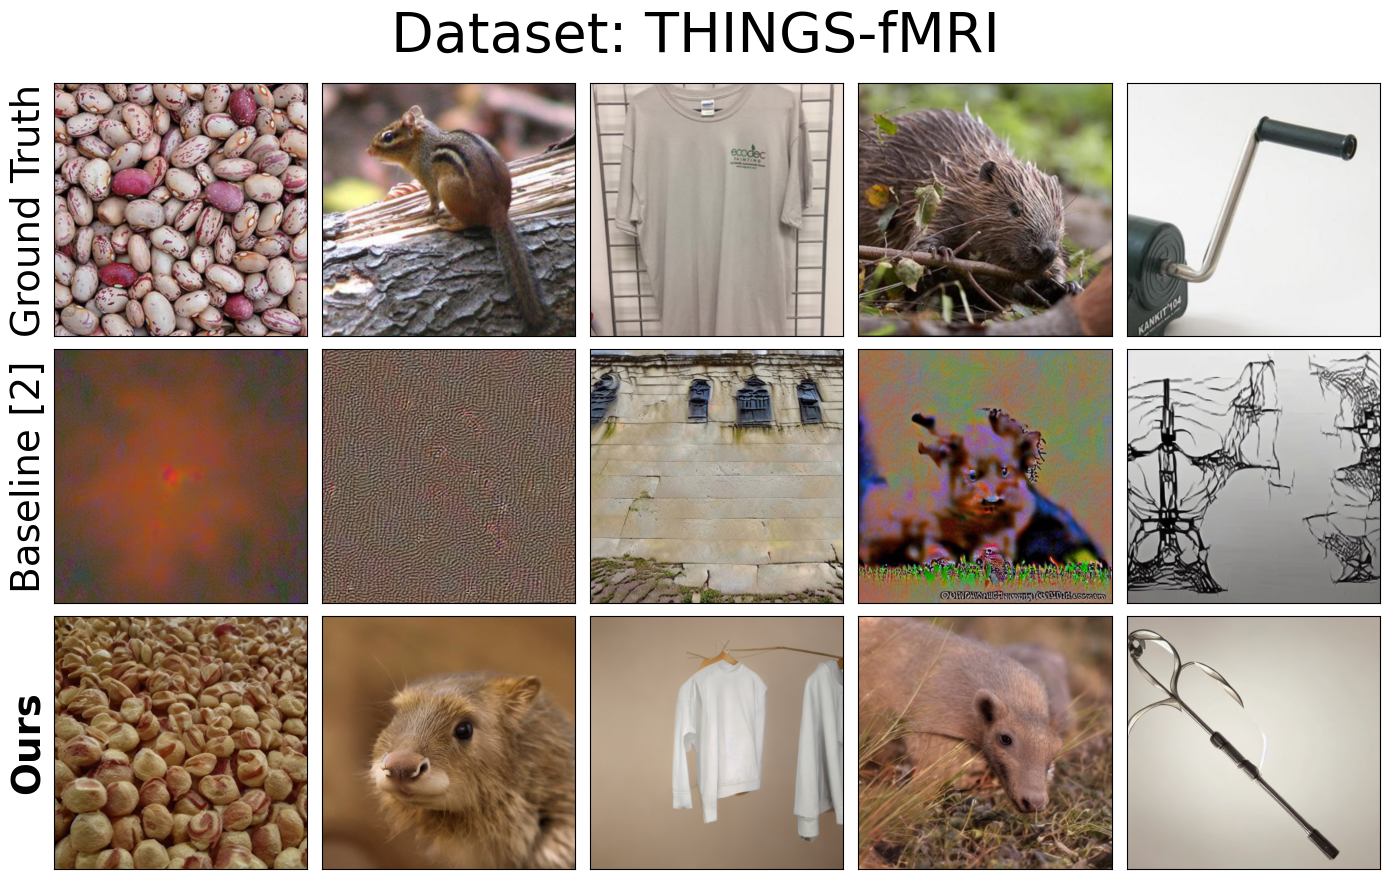

In [15]:
from matplotlib import pyplot as plt
# img_dict = {14:[1,1],179:[1,1],803:[1,4],289:[2,4],
#             954:[3,0],825:[1,1],225:[0,0],186:[2,4]}
img_dict = {13:[4,4],40:[0,0],42:[1,1],50:[2,1],
            57:[4,4]}
fig, axs = plt.subplots(3, 5, figsize=(14, 9))

gt_path = '/hdd/yuchen/decoded/image-cvpr/subj01/things/samples/'
baseline_path = '/hdd/yuchen/decoded/image-cvpr/subj01/things-baseline/samples/'
pred_path = '/hdd/yuchen/decoded/image-cvpr/subj01/things/samples/'
ct = 0
for idx in img_dict.keys():
    base = str(f'{idx:05}')
    orig = gt_path + f'{base}_org.png'
    orig_ = Image.open(orig).resize((512,512), Image.Resampling.BILINEAR)
    axs[0, ct].imshow(orig_)
    baseline = baseline_path + f'{base}_{img_dict[idx][1]:03}.png'
    baseline_ = Image.open(baseline)
    pred = pred_path + f'{base}_{img_dict[idx][0]:03}.png'
    pred_ = Image.open(pred)
    axs[1, ct].imshow(baseline_)
    axs[2, ct].imshow(pred_)
    ct += 1

for i in range(3):
    for j in range(5):
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])

axs[0,0].set_ylabel('Ground Truth', fontsize=28)
axs[1,0].set_ylabel('Baseline [2]', fontsize=28)
axs[2,0].set_ylabel('Ours', fontsize=28,fontweight='bold')
fig.suptitle('Dataset: THINGS-fMRI', fontsize=40)
plt.tight_layout()